## 04. 자동미분

In [21]:
import torch

### 4-1. requires_grad

In [22]:
x = torch.ones(3, requires_grad=True)
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([1., 1., 1.], requires_grad=True)
None
None
True


In [23]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


C:\Users\hsjin\AppData\Local\Temp\ipykernel_92552\268873173.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)


In [24]:
z = y ** 2
print(z)
# print(z.grad)
# print(z.grad_fn)
# print(z.requires_grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)


## 4-2. backward()
- x -> y -> z 순의 계산에서 역전파를 통해 기울기를 구함(z->y->x)

In [25]:
result = z.sum()
result.backward()

In [26]:
print(z)
print(x.grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])


### 4-3. no_grad()
- 역전파를 중지해주는 것

In [27]:
x = torch.tensor(1.0, requires_grad=True)
y = x**2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
    y = x**2
    print(x.requires_grad)
    print(y.requires_grad)

True
True
True
False


### 4-4. detach()
- 그래프에서 연산을 분리해 주는 역할을 함

In [28]:
y.detach()

tensor(1.)

In [29]:
# %pip install matplotlib

### 실습1. 선형회귀 실습

Epoch [0 / 1000], loss:  466.1284
Epoch [100 / 1000], loss:  4.8651
Epoch [200 / 1000], loss:  4.6247
Epoch [300 / 1000], loss:  4.5358
Epoch [400 / 1000], loss:  4.5030
Epoch [500 / 1000], loss:  4.4909
Epoch [600 / 1000], loss:  4.4864
Epoch [700 / 1000], loss:  4.4847
Epoch [800 / 1000], loss:  4.4841
Epoch [900 / 1000], loss:  4.4839
Epoch [1000 / 1000], loss:  4.4838


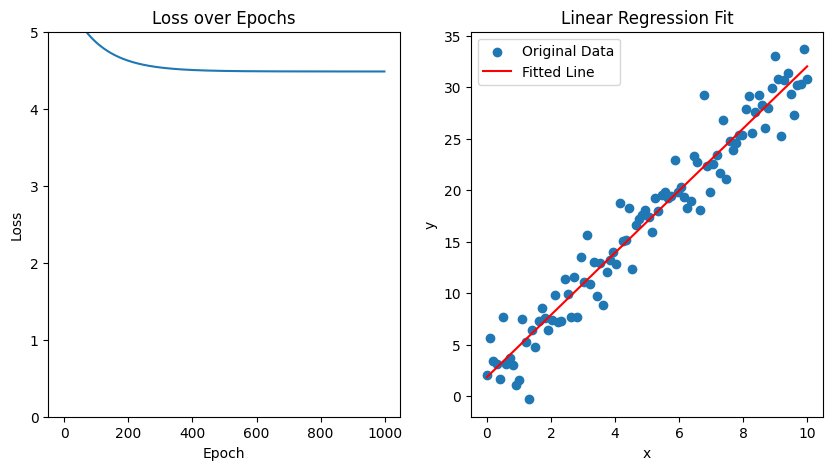

Model parameters
linear.weight : tensor([[3.0170]])
linear.bias : tensor([1.8572])


In [30]:
import torch.nn as nn #뉴럴네트워크의 약자임
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. 데이터 입출력 정의
x = torch.linspace(0,10,100).view(-1,1)#입력 데이터 #(시작,끝,갯수) , view(-1,1) -1: 자동계산, 1: 열기준으로 뗀것
y = 3 * x + 2 + torch.randn(100,1)*2 #정답을 의미함
# print(x)
# print(y)

# 2. 모델 정의 (선형회귀)
class LinearRegressionModel(nn.Module): #nn.Module : 상속받아오겠다.
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(1,1) #입력 1개, 출력 1개
        
    def forward(self,x): #순전파 진행
        out =  self.linear(x) #linear를 활성화 함수로 하면 들어오는 값을 그대로 내보내겠다.
        return out #바로 return self.linear(x)해도 됨
        #sigmoid를 쓰면 들어오는 값을 0~1사이 값으로 나타내 주겠다.
    
model = LinearRegressionModel()

# 3. 손실함수 정의
#손실함수 선택 : MSE, MAE ...
loss_function = nn.MSELoss() #Mean Squared Error

# 4. 가중치 업데이트  #optimizer : 경사하강법에서 최적값을 찾기위한 것
# 경사하강법 -> 어떤 것을 사용할지 선택
optimizer = optim.SGD(model.parameters(), lr = 0.01) #확률적 경사하강법 lr:학습률(learning rate)
#model.parameters() : [가중치,편향]이 들어가있는 것임.

# 5. 학습 반복
epochs = 1000 #epochs:반복횟수
losses = [] #손실을 저장할 리스트 생성

for epoch in range(epochs):
    optimizer.zero_grad() # 반복할 때마다 기울기 초기화 
    outputs = model(x) #모델인 x를 예측한다.  #예측값 계산
    loss = loss_function(outputs, y) # 손실 게산
    loss.backward() # 역전파
    optimizer.step() #가중치 업데이트
    
    losses.append(loss.item()) #손실값 저장
    
    if epoch == 0: #100번당 한번씩 출력
        print(f'Epoch [{epoch} / {epochs}], loss: {loss.item(): .4f}')     
    
    if (epoch + 1) % 100 == 0: #100번당 한번씩 출력
        print(f'Epoch [{epoch + 1} / {epochs}], loss: {loss.item(): .4f}') 

# 6. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1,2,1) #1행 2열로 나누고, 1번에 그리겠다.
plt.plot(losses)
plt.ylim(0,5)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 데이터와 예측 결과 시각화
plt.subplot(1,2,2) #1행 2열로 나누고, 2번에 그리겠다.
plt.scatter(x.numpy(),y.numpy(),label = 'Original Data') #넘파이로 바꿔야한다.
plt.plot(x.numpy(),model(x).detach().numpy(), color = 'red',label = 'Fitted Line') #detach()해서 분리해준다.
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

# 최종 모델 파라미터 확인
print('Model parameters')
for name, param in model.named_parameters(): #가중치와 bias(편향)가 어떻게 나왔는지 보여주기 위해
    print(f'{name} : {param.data}')

### 실습1. 다중 선형 회귀

Epoch [100 / 1000], loss:  2.2468
Epoch [200 / 1000], loss:  2.1919
Epoch [300 / 1000], loss:  2.1811
Epoch [400 / 1000], loss:  2.1725
Epoch [500 / 1000], loss:  2.1653
Epoch [600 / 1000], loss:  2.1592
Epoch [700 / 1000], loss:  2.1540
Epoch [800 / 1000], loss:  2.1495
Epoch [900 / 1000], loss:  2.1456
Epoch [1000 / 1000], loss:  2.1422

학습된 모델의 파라미터:
linear.weight : tensor([[ 0.2031,  0.5134, -0.0798]])
linear.bias : tensor([0.2920])


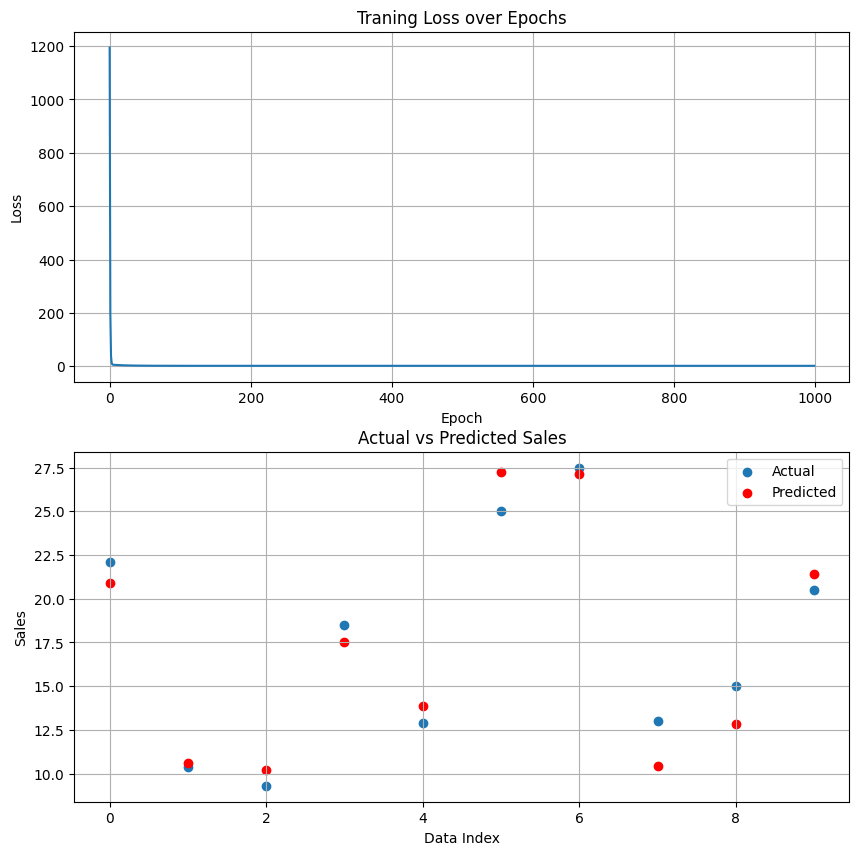

In [31]:
import torch.nn as nn #뉴럴네트워크의 약자임
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. 데이터 입출력 정의
x = torch.tensor([[50.0, 25.0, 30.0],
                [10.0, 20.0, 25.0],
                [5.0, 22.0, 30.0],
                [30.0, 26.0, 28.0],
                [40.0, 15.0, 28.0],
                [60.0, 35.0, 40.0],
                [70.0, 30.0, 35.0],
                [20.0, 15.0, 20.0],
                [25.0, 18.0, 22.0],
                [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)
# print(x)
# print(y)

# 2. 모델 정의 (다중 선형회귀)
class LinearRegressionModel(nn.Module): #nn.Module : 상속받아오겠다.
    def __init__(self):
        super(LinearRegressionModel,self).__init__() #super().__init__()만 해도 된다.
        self.linear = nn.Linear(3,1) #입력 3개, 출력 1개
        
    def forward(self,x): #순전파 진행
        return self.linear(x) #linear를 활성화 함수로 하면 들어오는 값을 그대로 내보내겠다.
        #sigmoid를 쓰면 들어오는 값을 0~1사이 값으로 나타내 주겠다.
    
model = LinearRegressionModel()

# 3. 손실함수 정의
#손실함수 선택 : MSE, MAE ...
loss_function = nn.MSELoss() #Mean Squared Error

# # 4. 가중치 업데이트  #optimizer : 경사하강법에서 최적값을 찾기위한 것
# # 경사하강법 -> 어떤 것을 사용할지 선택
optimizer = optim.SGD(model.parameters(), lr = 0.0001) #확률적 경사하강법 lr:학습률(learning rate)
# print(list(model.parameters())) #model.parameters() : [가중치,편향]이 들어가있는 것임.

# 5. 학습 반복
epochs = 1000 #epochs:반복횟수
losses = [] #손실을 저장할 리스트 생성

for epoch in range(epochs):
    optimizer.zero_grad() # 반복할 때마다 기울기 초기화 
    outputs = model(x) #모델인 x를 예측한다.  #예측값 계산
    loss = loss_function(outputs, y) # 손실 게산
    loss.backward() # 역전파
    optimizer.step() #가중치 업데이트
    
    losses.append(loss.item()) #손실값 저장
    
    if (epoch + 1) % 100 == 0: #100번당 한번씩 출력
        print(f'Epoch [{epoch + 1} / {epochs}], loss: {loss.item(): .4f}') 

# 최종 모델 파라미터 확인
print("")
print('학습된 모델의 파라미터:')
for name, param in model.named_parameters(): #가중치와 bias(편향)가 어떻게 나왔는지 보여주기 위해
    print(f'{name} : {param.data}')

# 6. 결과 시각화
plt.figure(figsize=(10,10))

# 손실 감소 그래프
plt.subplot(2,1,1) #1행 2열로 나누고, 1번에 그리겠다.
plt.plot(losses)
# plt.ylim(0,5)
plt.title('Traning Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()

# # 데이터와 예측 결과 시각화
plt.subplot(2,1,2) #1행 2열로 나누고, 2번에 그리겠다.
#actual = y.numpy()
#predicted = model(x).detach().numpy()
plt.scatter(range(len(y)),y.numpy(),label = 'Actual') #넘파이로 바꿔야한다.
plt.scatter(range(len(y)),model(x).detach().numpy(), color = 'red',label = 'Predicted') #detach()해서 분리해준다.
#model(x).detach().numpy()하면 기존의 연산에서 분리 시키고, x를 model에 넣어서 예측한 값임
plt.title('Actual vs Predicted Sales')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


### 실습2. 로지스틱 회귀

Epoch [100 / 1000], loss:  0.3569
Epoch [200 / 1000], loss:  0.2389
Epoch [300 / 1000], loss:  0.1707
Epoch [400 / 1000], loss:  0.1364
Epoch [500 / 1000], loss:  0.1174
Epoch [600 / 1000], loss:  0.1056
Epoch [700 / 1000], loss:  0.0976
Epoch [800 / 1000], loss:  0.0919
Epoch [900 / 1000], loss:  0.0875
Epoch [1000 / 1000], loss:  0.0841


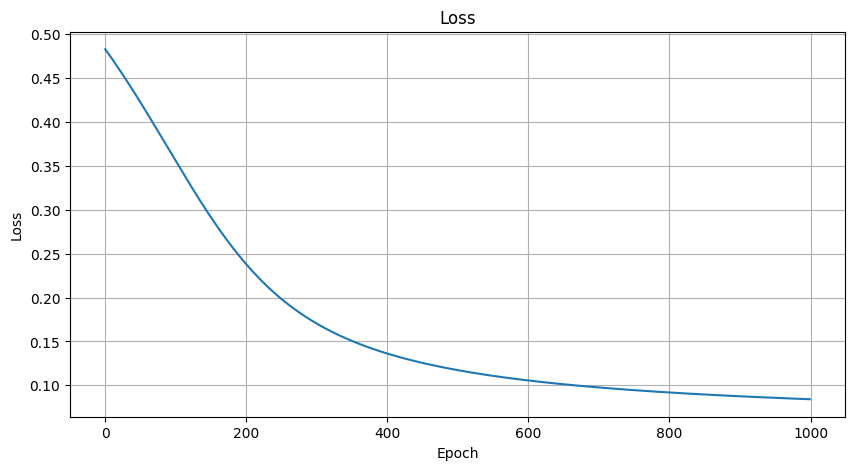

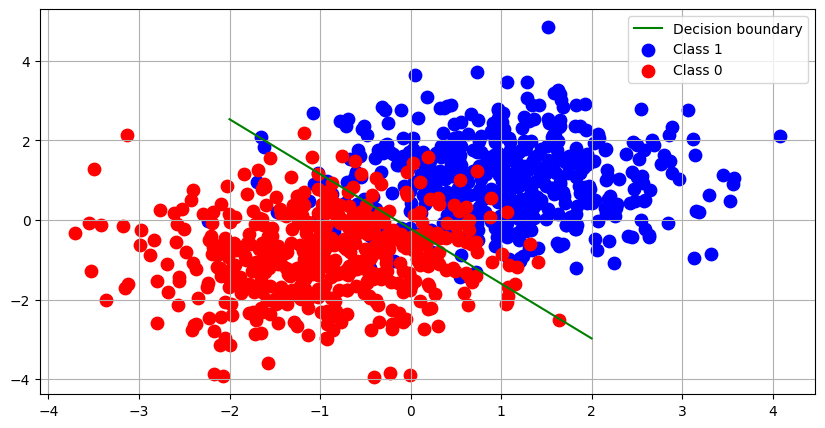


학습된 모델의 파라미터:
linear.weight : tensor([[0.8326, 0.6047]])
linear.bias : tensor([0.1354])


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 1. 입출력 정의
np.random.seed(42) # 난수가 한번 생성되면 고정해주는 것 42는 그냥 쓴것
# test = np.random.rand(5)
num_samples = 500

#1-1. class 1
mean_1 = np.array([1.0,1.0]) #ex)점 500개를 찍는데, 그 것들의 중심
cov_1 = np.array([[1,0], # x의 퍼짐정도     #분산 구하는 과정
                  [0,1]]) # y의 퍼짐정도
data_1 = np.random.multivariate_normal(mean_1,cov_1,num_samples) #평균,분산 있으면 적당하게 만들어주는것: (x,y)데이터를 적당히 만들어 주는것
# print(data_1)

# 1-2 class 0
mean_2 = np.array([-1.0,-1.0]) #ex)점 500개를 찍는데, 그 것들의 중심
cov_2 = np.array([[1,0], # x의 퍼짐정도     #분산 구하는 과정
                  [0,1]]) # y의 퍼짐정도
data_2 = np.random.multivariate_normal(mean_2,cov_2,num_samples) #평균,분산 있으면 적당하게 만들어주는것: (x,y)데이터를 적당히 만들어 주는것
# print(data_2)

 #numpy로 만든것이므로 pytorch에서 쓸 수 있는 텐서로 바꿔야 한다.
data = np.vstack((data_1,data_2)) #데이터 합치기 
data = torch.from_numpy(data).float()
labels = np.ones(num_samples * 2) #결과값(정답) 1:500개 class:1, 0:500개 class:0 
labels[num_samples:] = 0 
labels = torch.from_numpy(labels).float().view(-1,1)

# 2. 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out = self.linear(data)
        out = torch.sigmoid(out) #확률적회귀는 활성화 함수를 시그모이드로 사용한다. 노드에서 출력할 때 시그모이드를 쓴다.
        return out
        
model = LogisticRegression(2,1) #입력:0,1있으므로 

# 3. 손실함수 -> BCE사용
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() # 반복할 때마다 기울기 초기화 
    outputs = model(data) #모델인 data를 예측한다.  #예측값 계산
    loss = loss_function(outputs, labels) # 손실 게산
    loss.backward() # 역전파
    optimizer.step() #가중치 업데이트
    
    losses.append(loss.item()) #손실값 저장
    
    if (epoch + 1) % 100 == 0: #100번당 한번씩 출력
        print(f'Epoch [{epoch + 1} / {epochs}], loss: {loss.data: .4f}') 

# 6. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
# plt.subplot(2,1,1) #1행 2열로 나누고, 1번에 그리겠다.
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
# 결정 경계함수 정의
w = model.linear.weight.data.numpy()
b = model.linear.bias.data.numpy()
x1 = np.array([-2,2])
x2 = (-(w[0][0] * x1)-b[0]) / w[0][1]
# 0 = w1*x1 + w2*x2 +b
# x2 = (-(w1*x1)-b)/w2

plt.plot(x1,x2,color='g',label='Decision boundary')#줄긋기
plt.scatter(data_1[:,0],data_1[:,1], color = 'b', label='Class 1', s=80) #[[x, y]]
plt.scatter(data_2[:,0],data_2[:,1], color = 'r', label='Class 0', s=80)
plt.grid()
plt.legend()
plt.show()

# 최종 모델 파라미터 확인
print("")
print('학습된 모델의 파라미터:')
for name, param in model.named_parameters(): #가중치와 bias(편향)가 어떻게 나왔는지 보여주기 위해
    print(f'{name} : {param.data}')

### 실습3. FashionMNIST 신경망 구현

In [33]:
#예시
outputs = torch.tensor([[0.2,2.1,1.5,0.4],
                        [0.3,1.2,2.3,0.1]]) #클래스가 4개다.
answer = torch.tensor([1,3])
result = outputs.argmax(1) [1,2]
# print((result == answer).type(torch.float).sum().item())

IndexError: too many indices for tensor of dimension 1

In [ ]:
#refactoring 한것

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
# print(device)

# 1. 데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2. 모델 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512), # 입력층
      nn.BatchNorm1d(512), 
      nn.ReLU(),
      nn.Linear(512, 256), # Layer 1
      nn.BatchNorm1d(256), 
      nn.ReLU(),
      nn.Linear(256, 64), # Layer 2
      nn.BatchNorm1d(64), 
      nn.ReLU(),
      nn.Linear(64, 10), # 출력층
    ) # [0.2, 2.1, 1.5, 0.4, ......]

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear_relu_stack(out)
    return out

model = NeuralNetwork()
model.to(device) # GPU적용

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss = loss.item()
      current = batch * len(X)
      print(f"loss: {loss: .4f}, [{current} / {size}]")

def test_loop(dataloader, model, loss_fn):
  test_size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for X, y in dataloader:
      X = X.to(device)
      y = y.to(device)
      outputs = model(X)
      test_loss += loss_fn(outputs, y).item()
      correct += (outputs.argmax(1) == y).type(torch.float).sum().item()
  
  test_loss /= num_batches
  correct /= test_size
  print(f"Accuracy: {100*correct: .1f}, Avg loss: {test_loss}")


for epoch in range(epochs):
  print(f"Epoch: {epoch+1}----------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Complete!")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 1. 데이터 입출력 정의 #원본 데이터
training_data = datasets.FashionMNIST( #훈련할 때 traing_data
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST( #잘 훈련 됬는지 확인 할 때, test_data
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

#배치사이즈에 따른 데이터
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)
# print(training_data)

# 2.모델 정의
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() #데이터를 2차원으로 평탄화 시킬것임
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # <-입력층, 사이즈:28*28, 512개로 줄여줄것임 #신경망에 여러개의 층을 만들 것임
            nn.BatchNorm1d(512), #1차원 데이터에대한것을 노말라이즈 한다.
            nn.ReLU(),
            nn.Linear(512,256), # layer1
            nn.BatchNorm1d(256), #1차원 데이터에대한것을 노말라이즈 한다.
            nn.ReLU(),
            nn.Linear(256,64), # layer2
            nn.BatchNorm1d(64), 
            nn.ReLU(),
            nn.Linear(64,10) #출력층
        )
        
    def forward(self,x): #forward있어야지 출력 가능
        out = self.flatten(x)
        out = self.linear_relu_stack(out)
        return out
        
model = NeuralNetwork()
model.to(device)# GPU적용

#3.손실함수 정의 #이항분류:binaryentropy #다중분류:crossentropy
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)
epochs = 10

for epoch in range(epochs):
    print(f'Epoch: {epoch+1}---------------')
    size = len(train_dataloader.dataset)
    for batch, (x,y) in enumerate(train_dataloader): #batch만큼씩 진행 #train데이터에서 batch(인덱스)와 x,y가 나옴
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = loss_fn(outputs,y)
        loss.backward()
        optimizer.step() #기울기(가중치) 업데이트
        
        if batch % 100 == 0:
            loss = loss.item()
            current = batch * len(x) #len(x)는 64임
            print(f'loss: {loss: .4f}, [{current} / {size}]')
    
    #테스트 진행중
    test_size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    test_loss = 0 #테스트에서 발생하는 에러를 누적할거고
    correct = 0 #정답 알려준다.as_integer_ratio
    
    with torch.no_grad(): #테스트할때는 기울기를 업데이트 하지 않아서
        for x,y in test_dataloader:
            x = x.to(device)
            y = y.to(device) #gpu로 연산하겠다.capitalize
            outputs = model(x)
            test_loss += loss_fn(outputs,y).item() #item()쓰면서 값을 추출함
            correct += (outputs.argmax(1) == y).type(torch.float).sum().item() 
            #10개의 점수(output)중 가장 큰것을 정답으로 예측하고, 실제(y)와 같으면 정답, 아니면 정답 아님
            #true를 숫자로 변경해서 더해주는것임
    test_loss /= num_batches #평균 loss계산. 다 더한것으로 나누니까
    correct /= test_size
    print(f'Accuracy: {100*correct: .1f}, Avg loss: {test_loss}')
    

Epoch: 1---------------
loss:  2.3977, [0 / 60000]
loss:  0.5523, [6400 / 60000]
loss:  0.4247, [12800 / 60000]
loss:  0.5181, [19200 / 60000]
loss:  0.4277, [25600 / 60000]
loss:  0.4121, [32000 / 60000]
loss:  0.3050, [38400 / 60000]
loss:  0.4808, [44800 / 60000]
loss:  0.3915, [51200 / 60000]
loss:  0.4253, [57600 / 60000]
Accuracy:  85.1, Avg loss: 0.4059211676287803
Epoch: 2---------------
loss:  0.3528, [0 / 60000]
loss:  0.3347, [6400 / 60000]
loss:  0.2663, [12800 / 60000]
loss:  0.3130, [19200 / 60000]
loss:  0.3233, [25600 / 60000]
loss:  0.3096, [32000 / 60000]
loss:  0.2579, [38400 / 60000]
loss:  0.3629, [44800 / 60000]
loss:  0.3301, [51200 / 60000]
loss:  0.3702, [57600 / 60000]
Accuracy:  85.7, Avg loss: 0.38153994766769894
Epoch: 3---------------
loss:  0.2511, [0 / 60000]
loss:  0.2865, [6400 / 60000]
loss:  0.2374, [12800 / 60000]
loss:  0.2335, [19200 / 60000]
loss:  0.3206, [25600 / 60000]
loss:  0.2667, [32000 / 60000]
loss:  0.2282, [38400 / 60000]
loss:  0.3135

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#
label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15,15))
model.eval() #모델을 평가모드로 변경

for i in range(1, columns * rows +1):
    data_idx = np.random.randint(len(test_dataloader))
    input_img = test_data[data_idx][0].to(device)
    label = test_data[data_idx][1]
    
    with torch.no_grad(): #예측하는 것이 아니라 평가하는 것이므로 기울기 안씀
        output = model(input_img)
        _, prediction = torch.max(output,1) #10개 클래스중 가장큰 값 고르는것
        pred_class = label_tags[prediction.item()] #가져올것
        true_class = label_tags[label]
        
    title = f'{pred_class}, correct!' if pred_class == true_class else f"{pred_class} is incorrect!!"
    cmap = 'Blues' if pred_class == true_class else 'Reds'
    
    fig.add_subplot(rows,columns,i)
    plot_img = input_img.squeeze().cpu().numpy()
    plt.imshow(plot_img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    
plt.show()

NameError: name 'model' is not defined

<Figure size 1500x1500 with 0 Axes>

## CNN 구현

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 1. 데이터 입출력
# 데이터 전처리 (Normalization)
transform = transforms.Compose([transforms.RandomHorizontalFlip(),  #데이터 증강 : 이미지를 좌우 반전해주는 것
                                transforms.RandomCrop(32, padding=4), # 32*32 -> 40*40 (32+4+4) 32*32사이즈에서 패딩 넣어서 랜덤으로 32로 다시 자름
                                transforms.ToTensor(),  # 텐서로 변환
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # 정규화[(RGB편균),(RGB표준편차)]
                                
# CIFAR-10 데이터 로드
# 10개의 클래스로 구성된 32*32 60000개 컬러 이미지
#훈련용
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)

#테스트용
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# 2. 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        #conv 레이어를 2번 / pooling 2번 : 특징 추출 시 이미지 사이즈를 줄여줌 / activation : reLU
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3,6,5), #32*32->28(32-5+1)*28*6(필터) #(r,g,b):3개,필터갯수:6,커널사이즈:5 
            nn.ReLU(),
            nn.MaxPool2d(2,2), # stride : 28*28 -> 14*14 (MaxPooling시 사이즈 절반됨)
            nn.Conv2d(6,16,5), # 14*14->10(14-5+1)*10   #필터6개라서 채널이6개됨, 필터:16개
            nn.MaxPool2d(2,2), # 10*10->5*5
            
        )
        self.flatten = nn.Flatten()
        self.fc_layer = nn.Sequential( #fully connected
            nn.Linear(5*5*16,120), #이미지 하나 사이즈 * 필터갯수:16
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10), # ex) [1,2,0.2,0.3]
        )
    def forward(self,x):
        out = self.conv_layers(x)
        flatten = self.flatten(out)
        fc_out = self.fc_layer(flatten)
        return fc_out

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleCNN().to(device)
        
# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss() #다중분류이므로 CrossEntropy씀

# 4. 가중치 학습
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #정확성 높이려면 SGD대신에 ADAM을 사용한다. #momentum:이전에 하던걸 관성 가져감 
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader): #inputs:x (입력), labels:y (정답)
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad() #기울기 초기화
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step() #가중치(기울기) 업데이트
        
        running_loss += loss.item() #손실값 업데이트

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

print("학습 완료")

# 테스트하기
correct = 0
total = len(test_loader.dataset)
with torch.no_grad(): # test는 기울기 계산 X
    for (images, labels) in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")



Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 2.3010449013710024
Epoch 2, Loss: 2.2791826672554016
Epoch 3, Loss: 2.097503844499588
Epoch 4, Loss: 1.9329261982440948
Epoch 5, Loss: 1.8257645297050475
Epoch 6, Loss: 1.758902778148651
Epoch 7, Loss: 1.7158394465446472
Epoch 8, Loss: 1.6834225747585296
Epoch 9, Loss: 1.6543314719200135
Epoch 10, Loss: 1.6242381942272186
학습 완료
Accuracy: 41.58%


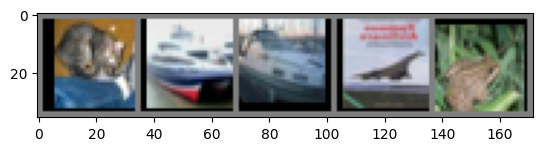

Predicted:  cat car car ship deer


In [19]:
#실제 이미지를 넣었을때 어떻게 예측하는지 알아보는 것

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize, 0~1범위의 이미지를 -1~1의 범위로 사용했기 때문에 -0.5 -> *2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # 이미지 차원 변경 torch (채널, 높이, 너비) -> plt (높이, 너비, 채널)
    plt.show()

def visualize_predictions(model, test_loader, num_images=5):
    dataiter = iter(test_loader) #테스트로더에서 이미지 가져오고
    images, labels = next(dataiter) # 첫번째 배치의 이미지만 가져오기

    # 이미지 출력
    imshow(torchvision.utils.make_grid(images[:num_images]))

    # 모델 예측
    images = images.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()

    # 레이블 정의
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 예측 결과 출력
    print("Predicted: ", " ".join(classes[predicted[j]] for j in range(num_images)))

visualize_predictions(model, test_loader, num_images=5)